In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from IPython.display import clear_output
import numpy as np
import pandas as pd

import sys
sys.path.append('..')

from lib.ChurnEnsemble import ChurnEnsemble
from lib.utils import show_summary

SEED = 42
np.random.seed(SEED)

2024-06-08 15:54:56.877718: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('../files/churn-data-predict.csv')

for col in ['tp', 'ts', 'te']:
    data[col] = pd.to_datetime(data[col])

show_summary(data)
data

Shape: 101,766 x 40


,id,tp,tgt,tfs,tte,ts,te,employees,mrr,value,...,usage_groups_avg,usage_payments_avg,paid_periods,failed_periods,active_periods,momentum,months,failed_ratio,usage_diff,sid
0,1,2017-07-01,0,4.0,-1.0,2017-03-01,NaT,1,26.58,159.50,...,0.0,0.0,0.0,0.0,1.0,0.00,4.0,NaN,0.00,51b46d18c4de615d0f000019
1,1,2017-08-01,0,5.0,-1.0,2017-03-01,NaT,1,26.58,159.50,...,0.0,0.0,0.0,0.0,2.0,1.20,5.0,NaN,0.00,51b46d18c4de615d0f000019
2,1,2017-09-01,0,6.0,-1.0,2017-03-01,NaT,1,26.58,239.25,...,0.0,0.0,1.0,0.0,3.0,-3.14,6.0,0.0,0.00,51b46d18c4de615d0f000019
3,1,2017-10-01,0,7.0,-1.0,2017-03-01,NaT,1,26.58,239.25,...,0.0,0.0,1.0,0.0,3.0,-13.60,7.0,0.0,-0.75,51b46d18c4de615d0f000019
4,1,2017-11-01,0,8.0,-1.0,2017-03-01,NaT,1,26.58,239.25,...,0.0,0.0,1.0,0.0,3.0,-18.57,8.0,0.0,-0.60,51b46d18c4de615d0f000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,2680,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,101.97,101.97,...,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.00,66633bcee489710bb6afe3d9
101762,2681,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,40.00,40.00,...,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.00,666346aee489710bb6afead3
101763,2682,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,46.62,46.62,...,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.00,66634aea1e0bd65a73bf4f2f
101764,2683,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,60.19,60.19,...,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.00,666388b3e489710bb6b00925


In [3]:
model = ChurnEnsemble(
    seed=SEED,
    verbose=1,
    path='../files'
).load()

model

In [4]:
model.data = data

clear_output(wait=True)
show_summary(model.data)
model.data.tail()

Shape: 101,766 x 40


,id,tp,tgt,tfs,tte,ts,te,employees,mrr,value,...,usage_groups_avg,usage_payments_avg,paid_periods,failed_periods,active_periods,momentum,months,failed_ratio,usage_diff,sid
101761,2680,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,101.97,101.97,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66633bcee489710bb6afe3d9
101762,2681,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,40.00,40.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,666346aee489710bb6afead3
101763,2682,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,46.62,46.62,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66634aea1e0bd65a73bf4f2f
101764,2683,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,60.19,60.19,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,666388b3e489710bb6b00925
101765,2684,2024-06-01,0,0.0,-1.0,2024-06-01,NaT,1,43.03,43.03,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6663930fe489710bb6b00eac


In [5]:
model.predict()

clear_output(wait=True)
model.xgb.results

,id,tfs,pred
0,1,4,0.196167
1,1,5,0.196984
2,1,6,0.224467
3,1,7,0.322725
4,1,8,0.384377
...,...,...,...
101761,2680,0,0.558705
101762,2681,0,0.571784
101763,2682,0,0.657229
101764,2683,0,0.610301


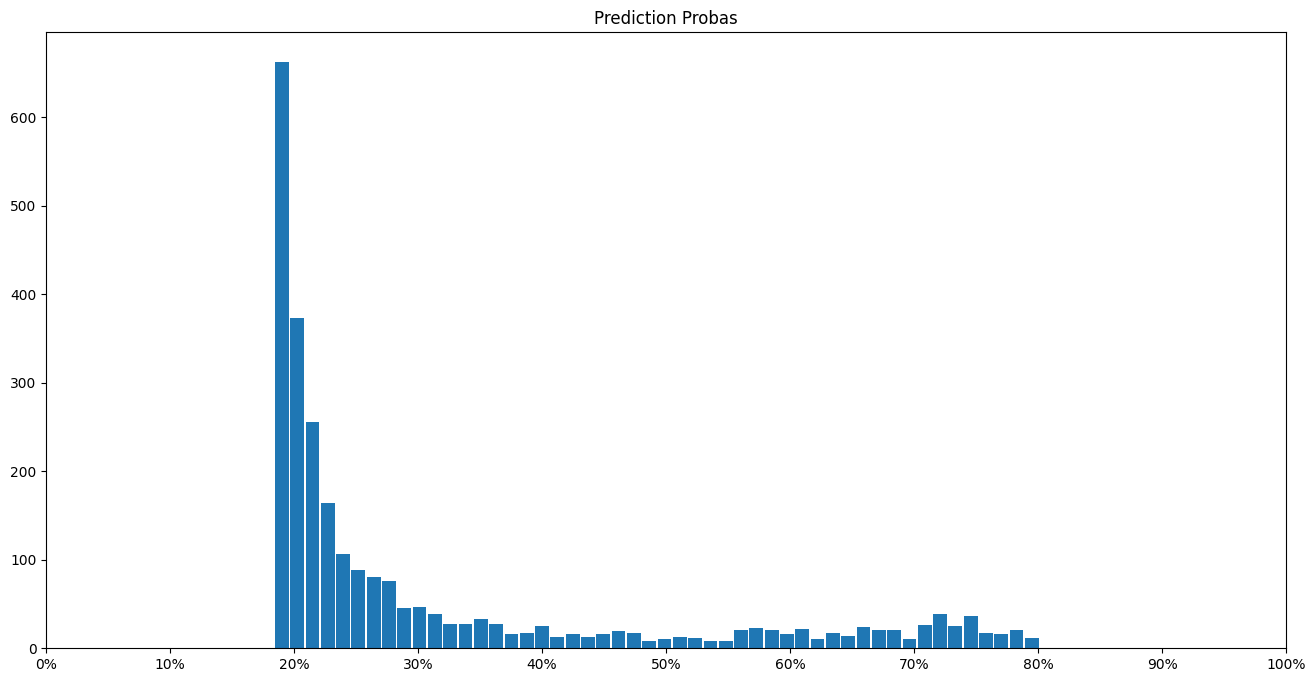

In [6]:
model.xgb.plot_histogram(model.xgb.results, loc=-1, file='xgb-histogram-pred.png')

In [7]:
results = model.results()

show_summary(results, 'seg')
results

Shape: 2,684 x 7
    1: 1,671 (62.26%)
    2: 472 (17.59%)
    3: 269 (10.02%)
    5: 179 (6.67%)
    4: 93 (3.46%)


,id,pred,tgt,seg,wa,wb,mom
0,51b46d18c4de615d0f000019,0.508574,0,3,9.066448,1.387055,-22.60
1,51c6bee4885ef11f7200030b,0.224784,0,1,6.122034,1.841663,1.80
2,51d4af244e30af6436000001,0.196145,0,1,9.344447,1.497280,1.07
3,51de98a50f42e6597c00009c,0.191919,0,1,12.485729,1.579090,0.23
4,51e7ebf61aae11927e00001e,0.188954,0,1,9.401626,1.610555,0.23
...,...,...,...,...,...,...,...
2679,66633bcee489710bb6afe3d9,0.558705,0,3,7.401144,1.034221,0.00
2680,666346aee489710bb6afead3,0.571784,0,3,12.753504,1.112418,0.00
2681,66634aea1e0bd65a73bf4f2f,0.657229,1,4,8.291779,1.070312,0.00
2682,666388b3e489710bb6b00925,0.610301,0,3,10.275689,1.113295,0.00
